In [8]:
#import necessary libraries
import cv2
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt


In [20]:
#load the image (adjust the file path to your image)
image_path = '/content/fruits.jpg'
image = cv2.imread(image_path)

In [21]:
#convert the image from BGR to RGB format (opencv loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

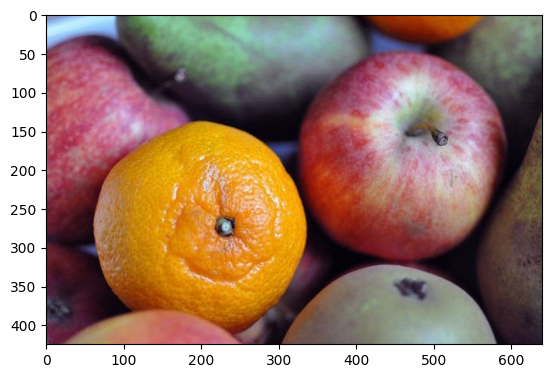

In [22]:
#Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()

In [24]:
#resize the image to 500x500 pixels
resized_image = cv2.resize(image_rgb, (500, 500))

In [26]:
#save the preprocessed image
cv2.imwrite('preprocessed_image.jpg', resized_image)

True

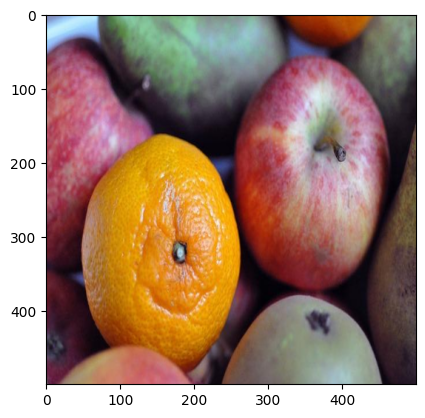

In [29]:
#display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis()
plt.show()

In [31]:
#rotate the image (90 degrees clockwise)
rotated_image_90 = cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)

In [33]:
#save the rotated image
cv2.imwrite('rotated_image_90.jpg', rotated_image_90)

True

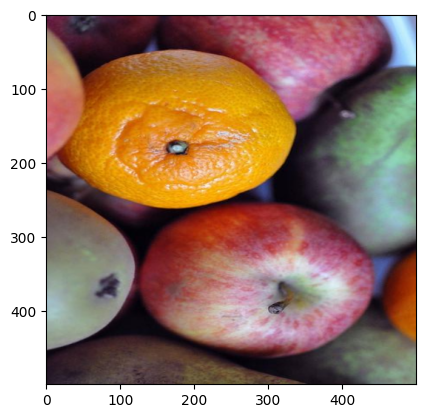

In [35]:
#display the rotated image using matplotlib
plt.imshow(rotated_image_90)
plt.axis()
plt.show()

In [37]:
#denoise the image using gaussian blur
denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)

In [39]:
#save the denoised image
cv2.imwrite('denoised_image.jpg', denoised_image)

True

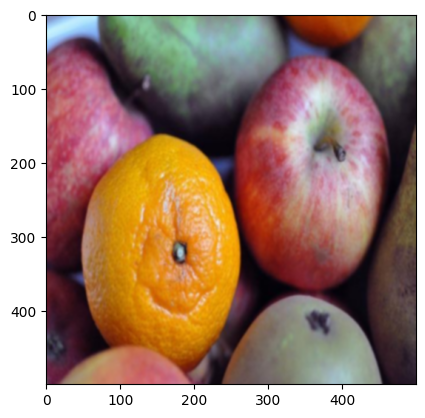

In [41]:
#display the denoised  image using matplotlib
plt.imshow(denoised_image)
plt.axis()
plt.show()

In [44]:
#apply resizing, rotation annd denoising to the image and save it as a processed image
image = cv2.imread('/content/fruits.jpg')

In [46]:
#convert the image from BGR to RGB format(openCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [48]:
#resize the same image to 500x500 pixel
image_rgb = cv2.resize(image_rgb, (500, 500))

In [50]:
#rotate the image (90 degrees clockwise)
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

In [52]:
#denoise the image using gaussian blur
image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

In [54]:
#save the processed image
cv2.imwrite('processed_image.jpg', image_rgb)

True

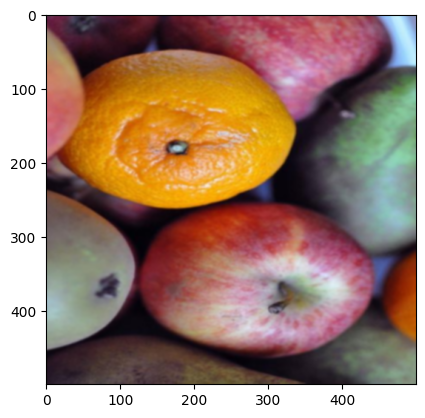

In [56]:
#display the denoised image using marplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()

In [59]:
#metadata for the processed fruit image
Metadata = {
    "processed_image.jpg":{
        "keywords":["Fruits", "healthy food", "green"],
        "description": "A processed fruit image with resizing, rotation, and denoising applied."
    }
}

In [62]:
#save metadata to JSON file
with open ('image_metadata.json', 'w') as json_file:
    json.dump(Metadata, json_file, indent=4 )

In [69]:
#load the processed fruit image, earlier saved
processed_image = cv2.imread('/content/processed_image.jpg')

In [70]:
#calculate mean and norm of pixel intensities
mean_intensity = np.mean(processed_image)
norm_intensity = np.linalg.norm(processed_image)

In [72]:
#convert to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

In [74]:
#apply canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

In [76]:
#find contours from the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [84]:
#iterate through each contour to calculate the shape features
for contour in contours:
    area = cv2.contourArea(contour)

    #perimeter (arc length)
    perimeter = cv2.arcLength(contour, True)  #true means the contour is closed

    #centroid (center of mass)
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
    else:
      cx,cy = 0,0

    #bounding box (smallest rectangle that contains the object)
    x, y, w, h = cv2.boundingRect(contour)

    #print the shape features
    print(f"Area: {area}, perimeter: {perimeter}, centroid: ({cx}, {cy}), Bounding Box: ({x}, {y}), width: {w}, Height: {h}")

Area: 7.0, perimeter: 27.798989176750183, centroid: (323, 395), Bounding Box: (319, 392), width: 11, Height: 9
Area: 18.5, perimeter: 115.154327750206, centroid: (308, 398), Bounding Box: (300, 386), width: 23, Height: 20
Area: 14.0, perimeter: 106.9116872549057, centroid: (77, 375), Bounding Box: (67, 367), width: 26, Height: 16
Area: 7.5, perimeter: 64.87005710601807, centroid: (321, 363), Bounding Box: (313, 361), width: 18, Height: 16
Area: 4.5, perimeter: 21.55634880065918, centroid: (95, 358), Bounding Box: (92, 355), width: 7, Height: 8
Area: 6.5, perimeter: 66.66904664039612, centroid: (82, 354), Bounding Box: (72, 350), width: 21, Height: 17
Area: 101.5, perimeter: 738.849847316742, centroid: (84, 342), Bounding Box: (0, 237), width: 121, Height: 218
Area: 4.5, perimeter: 69.69848430156708, centroid: (189, 232), Bounding Box: (171, 230), width: 31, Height: 5
Area: 33.5, perimeter: 24.727921843528748, centroid: (163, 233), Bounding Box: (160, 230), width: 8, Height: 8
Area: 4.0

In [87]:
#collect all the shape features as a dictionary
shape_features = {
    "Area": area,
    "Perimeter": perimeter,
    "Centroid": (cx, cy),
    "Bounding Box": (x, y, w, h)
}

In [89]:
#collect all the features extracted  from the processed_image and store as a meta data
features_extracted = {
    "Mean_Intensity": mean_intensity, #mean intensity calculated earlier
    "Norm_Intensity": norm_intensity, #norm intensity calculated earlier
    "Shape_Features": shape_features #list to hold shape features for each object
}

In [91]:
#save the features to a json file
with open('image_features.json', 'w') as json_file:
    json.dump(features_extracted, json_file, indent=4)

In [97]:
#import necessary library
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [99]:
#download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [102]:
#load the content of the specified file
with open('/content/101551') as file:
  document_101551 = file.read()

In [103]:
document_sample=document_101551[621:-15]

In [106]:
#text normalization:convert document_101551 to lowercase ad rename as document_101551_lower
document_101551_lower = document_101551.lower()

In [109]:
#tokenization split document_10551_lower into words
nltk.download('punkt_tab')
tokens = word_tokenize(document_101551_lower)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [111]:
#removal of punctuation
tokens = [word for word in tokens if word not in string.punctuation]

In [113]:
#removal of stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

In [115]:
#print the preprocessed tokens
print("Preprocessed Tokens:")
print(tokens)

Preprocessed Tokens:
['path', 'cantaloupe.srv.cs.cmu.edu', 'das-news.harvard.edu', 'ogicse', 'uwm.edu', 'wupost', 'uunet', 'brunix', 'cs.brown.edu', 'cs012055', 'cs012055', 'cs.brown.edu', 'hok-chung', 'tsang', 'newsgroups', 'rec.autos', 'subject', 'saturn', "'s", 'pricing', 'policy', 'message-id', '1993apr5.230808.581', 'cs.brown.edu', 'date', '5', 'apr', '93', '23:08:08', 'gmt', 'article-i.d', 'cs.1993apr5.230808.581', 'references', 'c4oxwp.kkm', 'news.cso.uiuc.edu', 'c4vir5.l3r', 'shuksan.ds.boeing.com', 'sender', 'news', 'cs.brown.edu', 'organization', 'brown', 'computer', 'science', 'dept', 'lines', '51', 'article', 'c4vir5.l3r', 'shuksan.ds.boeing.com', 'fredd', 'shuksan', 'fred', 'dickey', 'writes', 'carolinafan', 'uiuc', 'cka52397', 'uxa.cso.uiuc.edu', 'wrote', 'active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'points', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealers', 'make', '2k', 

In [119]:
#initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [124]:
from tkinter.constants import S
#applt stemming to tokens
stemmed_words = [stemmer.stem(word) for word in tokens]

#print the stems from the tokens
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['path', 'cantaloupe.srv.cs.cmu.edu', 'das-news.harvard.edu', 'ogics', 'uwm.edu', 'wupost', 'uunet', 'brunix', 'cs.brown.edu', 'cs012055', 'cs012055', 'cs.brown.edu', 'hok-chung', 'tsang', 'newsgroup', 'rec.auto', 'subject', 'saturn', "'s", 'price', 'polici', 'message-id', '1993apr5.230808.581', 'cs.brown.edu', 'date', '5', 'apr', '93', '23:08:08', 'gmt', 'article-i.d', 'cs.1993apr5.230808.581', 'refer', 'c4oxwp.kkm', 'news.cso.uiuc.edu', 'c4vir5.l3r', 'shuksan.ds.boeing.com', 'sender', 'news', 'cs.brown.edu', 'organ', 'brown', 'comput', 'scienc', 'dept', 'line', '51', 'articl', 'c4vir5.l3r', 'shuksan.ds.boeing.com', 'fredd', 'shuksan', 'fred', 'dickey', 'write', 'carolinafan', 'uiuc', 'cka52397', 'uxa.cso.uiuc.edu', 'wrote', 'activ', 'defend', 'saturn', 'late', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'repli', 'other', 'point', 'biggest', 'problem', 'peopl', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agre', 'car', 'compar'

In [126]:
#apply lemmanization to the tokens
lemmanized_words = [lemmatizer.lemmatize(word) for word in tokens]

#print the lemma from the tokens
print("Lemmatized Words:", lemmanized_words)

Lemmatized Words: ['path', 'cantaloupe.srv.cs.cmu.edu', 'das-news.harvard.edu', 'ogicse', 'uwm.edu', 'wupost', 'uunet', 'brunix', 'cs.brown.edu', 'cs012055', 'cs012055', 'cs.brown.edu', 'hok-chung', 'tsang', 'newsgroups', 'rec.autos', 'subject', 'saturn', "'s", 'pricing', 'policy', 'message-id', '1993apr5.230808.581', 'cs.brown.edu', 'date', '5', 'apr', '93', '23:08:08', 'gmt', 'article-i.d', 'cs.1993apr5.230808.581', 'reference', 'c4oxwp.kkm', 'news.cso.uiuc.edu', 'c4vir5.l3r', 'shuksan.ds.boeing.com', 'sender', 'news', 'cs.brown.edu', 'organization', 'brown', 'computer', 'science', 'dept', 'line', '51', 'article', 'c4vir5.l3r', 'shuksan.ds.boeing.com', 'fredd', 'shuksan', 'fred', 'dickey', 'writes', 'carolinafan', 'uiuc', 'cka52397', 'uxa.cso.uiuc.edu', 'wrote', 'active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'point', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 